# Predicting Heart Disease

### Intro

Cardiovascular diseases are medical conditions that affect the heart and blood vessels. Examples include heart failure, arrhythmia, and strokes. These diseases are among the leading causes of death worldwide. Because they have such a major impact on global health, many risk factors and symptoms have been identified to help detect current or future cases.

In this guided project, we are working for a fictional company focused on finding solutions for health conditions. Our goal is to build a machine learning model that can predict the likelihood of a person developing a cardiovascular disease in the future. We will be working with a Kaggle dataset that can be found [here.](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Our first steps in the code below will be to import the necessary libraries, load the data, and begin some basic exploratory analysis.

### Exploratory Analysis - Familiarization

In [1]:
# importing necessary libraries
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading in our data
df = pd.read_csv("heart_disease_prediction.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [7]:
df["FastingBS"].unique(), df["HeartDisease"].unique()

(array([0, 1]), array([0, 1]))

We explored our dataset and found that it contains 918 rows and 12 columns. Below are the definitions for each column:

* **Age**: Age of the patient (in years)
* **Sex**: Sex of the patient (M = Male, F = Female)
* **ChestPainType**: Type of chest pain
  * TA = Typical Angina
  * ATA = Atypical Angina
  * NAP = Non-Anginal Pain
  * ASY = Asymptomatic
* **RestingBP**: Resting blood pressure (in mm Hg)
* **Cholesterol**: Serum cholesterol level (in mg/dl)
* **FastingBS**: Fasting blood sugar (1 = >120 mg/dl, 0 = ≤120 mg/dl)
* **RestingECG**: Resting electrocardiogram results
  * Normal = Normal
  * ST = ST-T wave abnormality (e.g., T wave inversion, ST elevation/depression > 0.05 mV)
  * LVH = Signs of left ventricular hypertrophy (based on Estes' criteria)
* **MaxHR**: Maximum heart rate achieved (between 60 and 202)
* **ExerciseAngina**: Exercise-induced angina (Y = Yes, N = No)
* **Oldpeak**: ST depression induced by exercise (numeric value)
* **ST\_Slope**: Slope of the peak exercise ST segment
  * Up = Upsloping
  * Flat = Flat
  * Down = Downsloping
* **HeartDisease**: Target variable (1 = Heart disease, 0 = No heart disease)

We also observed that there are no missing values in any of the columns. After checking the data types, we found that all object-type columns are categorical. Additionally, even though `FastingBS` and `HeartDisease` are stored as integers, they are categorical too, since they only contain the values 0 and 1.

Next, we’ll look at summary statistics for the numerical columns using the `.describe()` function.

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The results show that our numeric columns have no missing values. However, the median (`50%`) value for the `Cholesterol` column is about 25 mg/dl higher than the mean, which may indicate the presence of outliers. We also see that both `RestingBP` and `Cholesterol` have minimum values of `0`. This is clearly incorrect, as it’s impossible for a living person to have a resting blood pressure or serum cholesterol level of zero. Finally, the average age of patients in our dataset is 53.

Before addressing the issues mentioned above, we'll continue with some additional exploratory analysis. Next, we'll examine the distribution of each categorical column in our dataset by creating bar charts to visualize them.

### Exploratory Analysis - Visualization

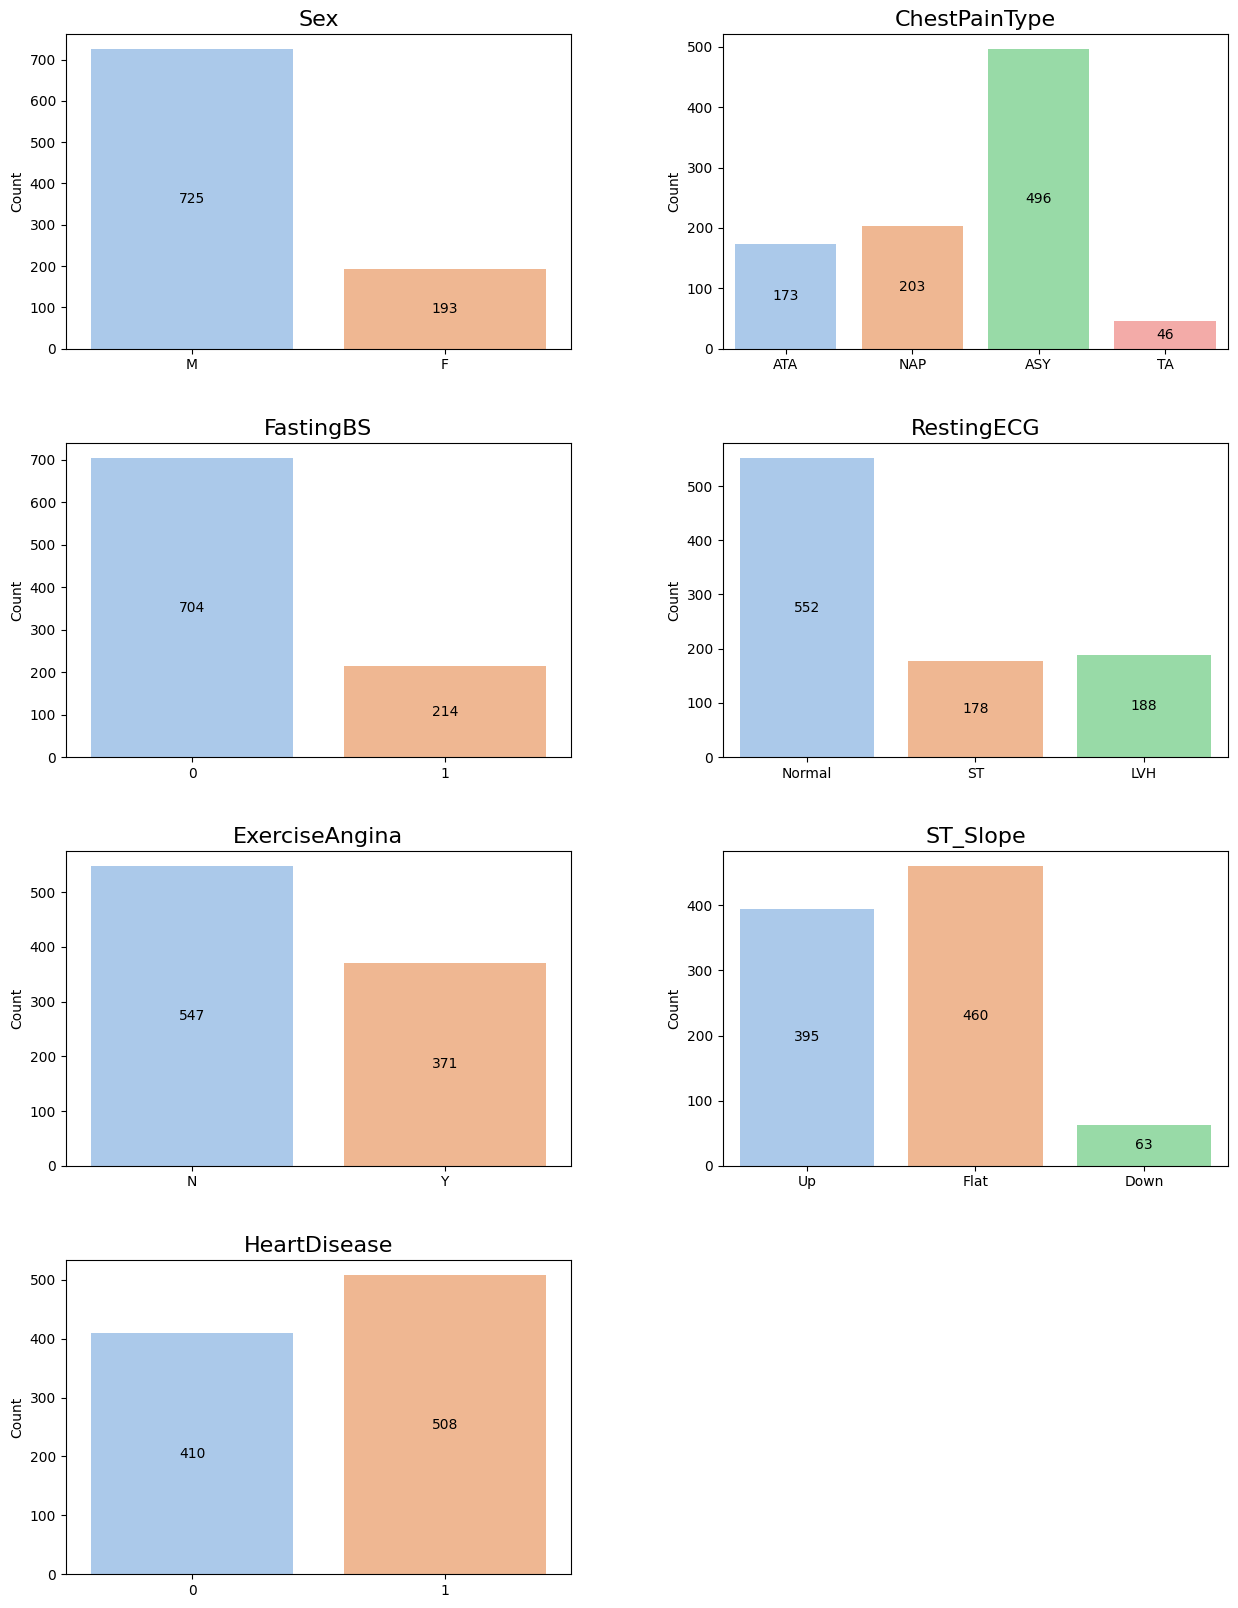

In [8]:
%matplotlib inline

# List of categorical columns
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", 
                    "ExerciseAngina", "ST_Slope", "HeartDisease"]

# Set up the plot grid
num_cols = 2
num_rows = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot each categorical column using seaborn
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    plot = sns.countplot(data=df, x=col, hue=col, ax=ax, palette='pastel', legend=False)
    ax.set_title(col, fontsize=16)
    ax.set_ylabel('Count')
    ax.set_xlabel('') 

    # Annotate bars with counts
    for container in plot.containers:
        plot.bar_label(container, labels=[int(bar.get_height()) for bar in container], 
                       label_type='center', fontsize=10, color='black')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

Looking at the bar graphs above, we observe the following:

* There are 725 male patients and 193 female patients.
* ASY (Asymptomatic) chest pain is the most common type, with 496 cases.
* 552 patients have a normal resting ECG result.
* 704 patients have a fasting blood sugar below 120 mg/dl.

These details may be important when we build our machine learning model. The `Sex` column, in particular, could introduce bias.

To gain deeper insight into the data, we'll create another visualization. This time, it will show how each category is distributed based on whether or not the patient has heart disease.

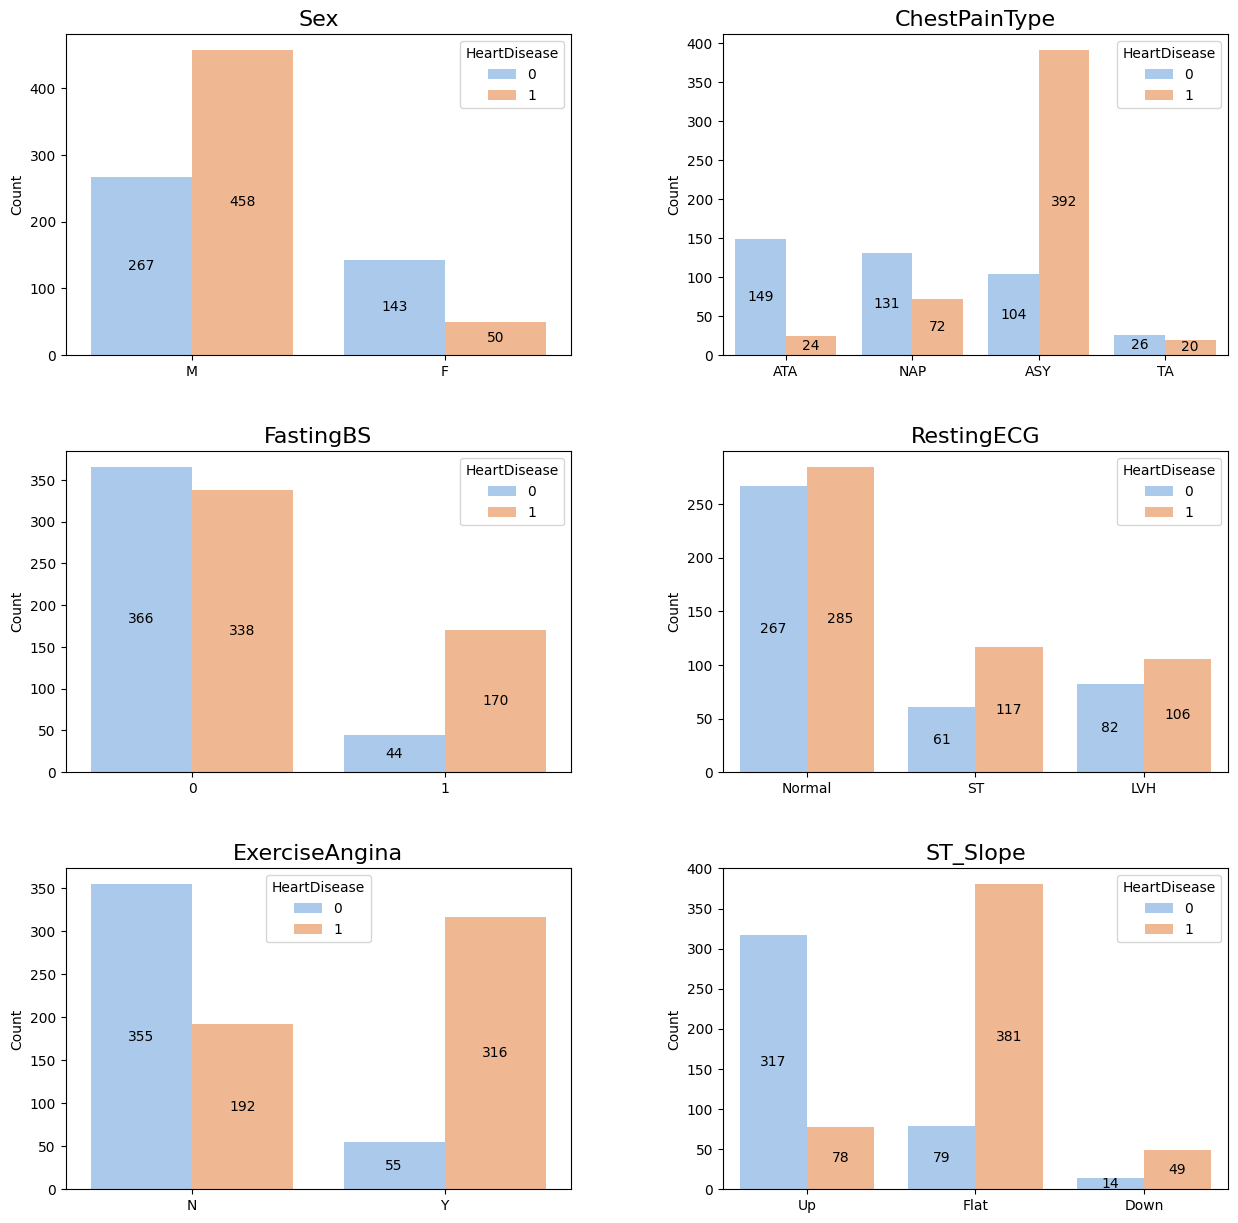

In [9]:
# List of categorical columns
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", 
                    "ExerciseAngina", "ST_Slope"]

# Set up the plot grid
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot each categorical column using seaborn
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    plot = sns.countplot(data=df, x=col, hue=df["HeartDisease"], ax=ax, palette='pastel', legend=True)
    ax.set_title(col, fontsize=16)
    ax.set_ylabel('Count')
    ax.set_xlabel('') 

    # Annotate bars with counts
    for container in plot.containers:
        plot.bar_label(container, labels=[int(bar.get_height()) for bar in container], 
                       label_type='center', fontsize=10, color='black')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

We’ve observed several key patterns in the data:

* Heart disease is more common in males than in females.
* It frequently occurs in patients with ASY (Asymptomatic) chest pain.
* Patients with blood sugar levels above 120 mg/dL are more likely to have heart disease — 170 such cases were recorded.
* Those with exercise-induced angina are also more likely to be diagnosed.
* A flat ST\_Slope is strongly linked to heart disease, with 381 diagnosed cases.

These patterns highlight important features that could help us build an effective model. But before we move forward, we need to clean the data to fix some issues we identified earlier.

### Data Cleaning

We’ll start by looking at two columns — `RestingBP` and `Cholesterol` — that contain invalid zero values. Our first step is to count how many zeros appear in each of these columns.

In [10]:
value_to_count = 0
rest_bp_zero = (df['RestingBP'] == value_to_count).sum()
colstrl_zero = (df['Cholesterol'] == value_to_count).sum()

print(f"In the 'RestingBP' column, 0 occurs {rest_bp_zero} times.")
print(f"In the 'Cholesterol' column, 0 occurs {colstrl_zero} times.")

In the 'RestingBP' column, 0 occurs 1 times.
In the 'Cholesterol' column, 0 occurs 172 times.


Now that we know how many zero values are in the data, we can decide how to handle them. For the `RestingBP` column, there's only one zero, so we can just remove that row. The `Cholesterol` column is different—it has 172 zero values, which is too many to delete without losing a lot of data. We decide to replace those zeros with the median value (grouped by `HeartDisease`). While this isn't the most accurate approach, it's a practical solution given our time constraints. The replacement allows us to preserve most of the data while still addressing the issue.

In [11]:
df_clean = df.copy()

# removing the column with the RestingBP zero value
df_clean = df_clean[df_clean['RestingBP'] != 0]

heartdisease_mask = df_clean["HeartDisease"]==0

cholesterol_without_heartdisease = df_clean.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = df_clean.loc[~heartdisease_mask, "Cholesterol"]

df_clean.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(to_replace = 0, value = cholesterol_without_heartdisease.median())
df_clean.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(to_replace = 0, value = cholesterol_with_heartdisease.median())

In [12]:
df_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


### Feature Selection

Now that our data is clean, we can start choosing which features to use in our model. Some possible features include:

* Age
* Sex
* ChestPainType
* Cholesterol
* FastingBS

To help decide which features to keep, we’ll create a correlation map, which shows how strongly each feature is related to the others. This visual tool helps us spot patterns and avoid using features that are too similar or not useful.

Before we can make the correlation map, we need to convert all categorical features into a format called dummy variables. Dummy variables turn categories (like words) into numbers by creating new columns for each unique value in the original column. In these new columns, a `1` means the row belongs to that category, and a `0` means it does not. This format makes the data easier for a computer to understand and use when building a model.

In [13]:
df_clean = pd.get_dummies(df_clean, drop_first=True)
bool_cols = df_clean.select_dtypes(include='bool').columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


Now that our data is ready, we will proceed to generate our correlation map.

<Axes: >

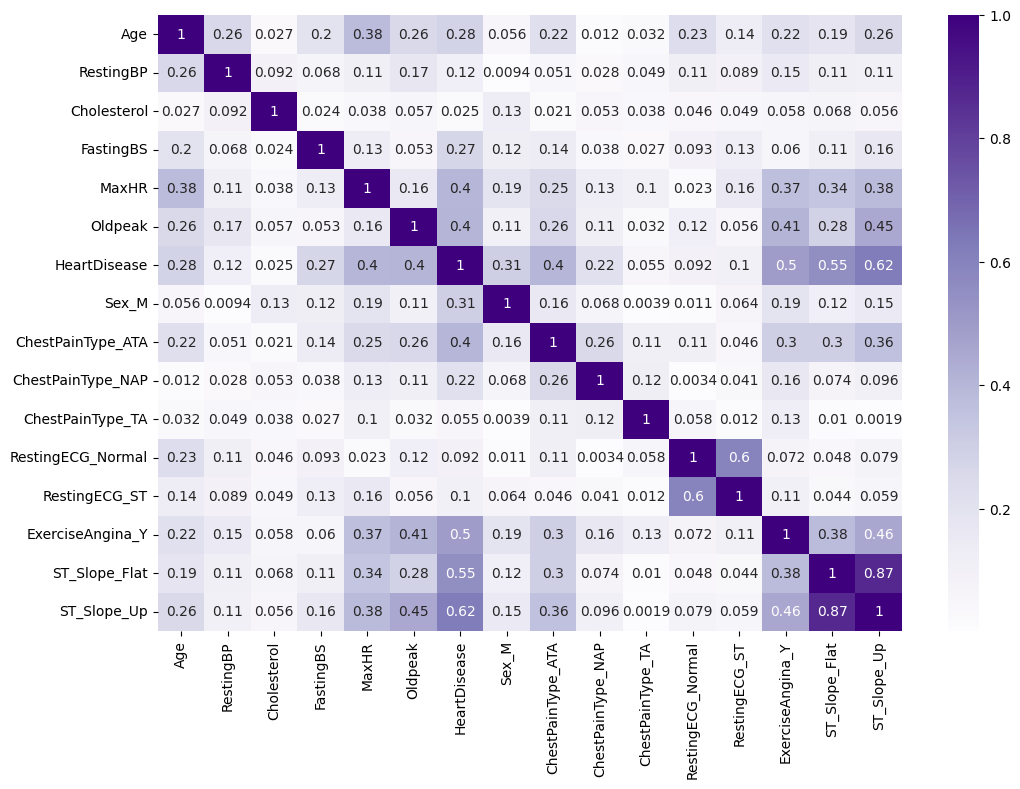

In [14]:
correlations = abs(df_clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="Purples")

By examining the correlation map above, we can quickly spot areas that appear darker, indicating stronger correlations. To emphasize these relationships, we'll display the map again—this time showing only the correlations greater than `0.3`.

<Axes: >

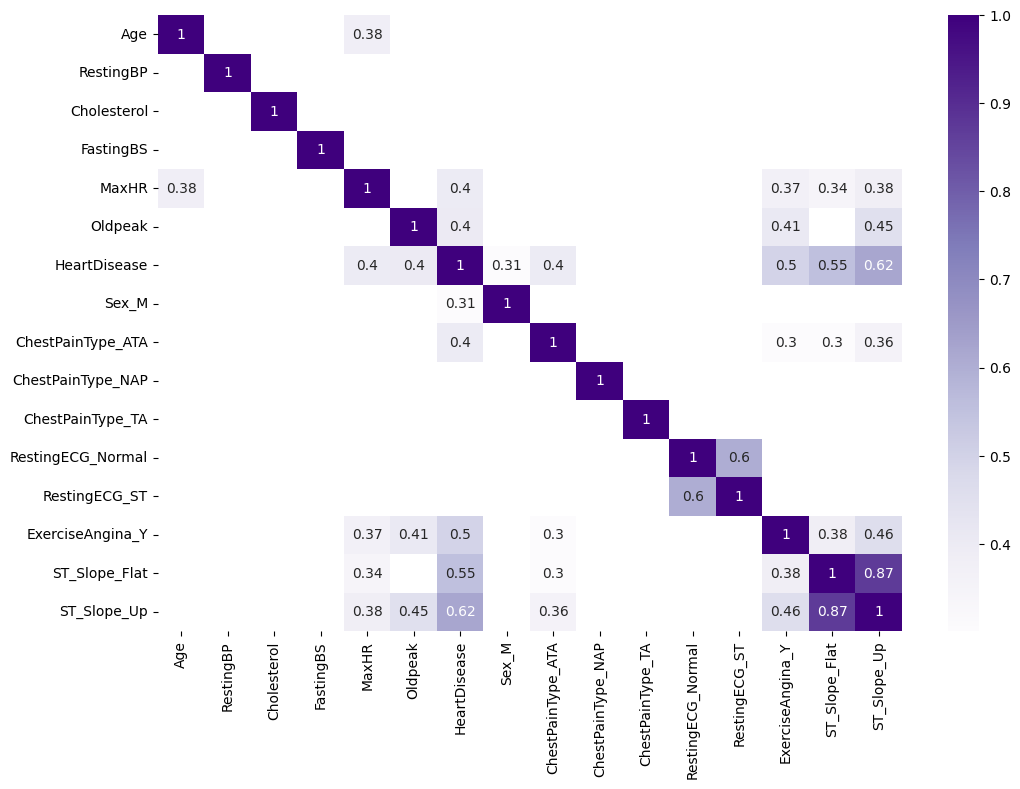

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations > 0.3], annot=True, cmap="Purples")

When we focus on the `HeartDisease` variable, we find that the following features have correlation values greater than `0.3`:

- `MaxHR`
- `Oldpeak`
- `Sex_M`
- `ChestPainType_ATA`
- `ExerciseAngina_Y`
- `ST_Slope_Flat`
- `ST_Slope_Up`

This helps us narrow down our initial list of possible features, which included:

- `Age`
- `Sex`
- `ChestPainType`
- `Cholesterol`
- `FastingBS`

Notably, `Cholesterol` does not appear among the strongly correlated features. Based on this, we’ve decided to exclude it from consideration at present.

Taking everything we've observed so far into account, our final selection of features includes:

- `Oldpeak`
  - Reasoning: Shows a strong correlation with heart disease.
- `Sex_M`
  - Reasoning: While the correlation is weaker, our exploratory data analysis (EDA) provides compelling evidence of its importance.
- `ExerciseAngina_Y`
  - Reasoning: Strong correlation value and additional support from EDA findings.
- `ST_Slope_Flat`
  - Reasoning: Strong correlation value and reinforced by our EDA.
- `ST_Slope_Up`
  - Reasoning: Displays a solid correlation with heart disease.

With these features selected, we're now ready to move forward and begin building our predictive model!

### Building a Classifier - One Feature

Our first step is to split the dataset into two parts: one for training the model and another for testing it after the model has been built.

In [16]:
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=417)

features = [
    'Oldpeak',
    'Sex_M',
    'ExerciseAngina_Y',
    'ST_Slope_Flat',
    'ST_Slope_Up'
]

Next, we'll create a test model for each of the selected features. After measuring the accuracy of each model, we'll choose the one that performs best to use as our final metric.

In [17]:
for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f'''The k-NN classifier trained on {feature} with k = 3 has an accuracy of {accuracy*100:.2f}%''')

The k-NN classifier trained on Oldpeak with k = 3 has an accuracy of 58.70%
The k-NN classifier trained on Sex_M with k = 3 has an accuracy of 61.59%
The k-NN classifier trained on ExerciseAngina_Y with k = 3 has an accuracy of 73.19%
The k-NN classifier trained on ST_Slope_Flat with k = 3 has an accuracy of 81.88%
The k-NN classifier trained on ST_Slope_Up with k = 3 has an accuracy of 55.07%


As shown above, the model that achieved the highest accuracy included the `ST_Slope_Flat` feature. The model using the `ExerciseAngina_Y` feature ranked second in performance. These outcomes align well with the patterns we identified earlier during our exploratory data analysis and correlation review.

### Building a Classifier – Multiple Features

Next, we will build a model that incorporates all of the features listed above and evaluate its overall accuracy.

In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 83.33%


Interestingly, using all the features in a single model resulted in even higher accuracy than using just `ST_Slope_Flat` or `ExerciseAngina_Y` alone. Next, we’ll explore how our model’s accuracy changes as we introduce different parameters and hyperparameters.

### Hyperparameter Tuning

To identify the best combination of parameters and hyperparameters for improving our model's accuracy, we’ll use the `GridSearchCV()` function. This tool systematically tests multiple combinations to determine which parameters delivers the highest accuracy.

In [20]:
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=417)

features = [
    'Oldpeak',
    'Sex_M',
    'ExerciseAngina_Y',
    'ST_Slope_Flat',
    'ST_Slope_Up'
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

With our training and testing data ready, we can now define the hyperparameters we’ll be testing. We’ll explore the following combinations:

- `k` values ranging from 1 to 20
- Two distance metrics: `minkowski` and `manhattan`

Since `minkowski` is the default distance metric in scikit-learn, we don’t expect `manhattan` to perform better. Still, we’ll test both to see how they compare.

In [21]:
grid_params = {
    'n_neighbors': range(1,20),
    'metric': ['minkowski', 'manhattan']
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

print("Best Parameters:", knn_grid.best_params_)
print(f"Best Accuracy Score: {knn_grid.best_score_*100:.2f}%")

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 19}
Best Accuracy Score: 83.44%


As shown above, the model using `minkowski` as the distance metric and `19` as the `n_neighbors` value achieved an accuracy of 83.44%. It’s important to note that `GridSearchCV` uses a technique called cross-validation splitting to evaluate model performance. For each combination of parameters, it trains a temporary model and then validates it, assigning a score based on this process. Thanks to this method, we can have a high level of confidence in the accuracy score assigned to the model with these parameters.

Since our model is performing reliably and has achieved a strong accuracy score, we’re now ready to test it on the data we set aside for evaluation.

### Model Evaluation on Test Set

Before evaluating our model on the test set, we need to ensure the data is formatted in the same way as the training data. Once our data is ready, we will run our model on it and measure its performance.

In [22]:
# preparing the data
X_test_scaled = scaler.transform(X_test[features])

# running the model on the test set
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on test set: {accuracy*100:.2f}%")

Model Accuracy on test set: 86.96%


At around 87%, our model performed quite well on the test set—surprisingly, even better than it did on the training data. While this might seem like a positive outcome at first, the discrepancy between the two scores raises some concerns. It could suggest that something is off—perhaps the test data isn't distributed as evenly as the training data, or vice versa. To ensure that our model will generalize well to new, unseen data, it's important to investigate further. In the code below, we'll compare the distributions of our full dataset, the training data, and the testing data to see if this might explain the difference in accuracy. Specifically, we’re going to examine the distribution of the `Sex_M` column, since we used it as a feature in our training model.

In [23]:
print(f'''Full Dataset Distribution:
Male: {int(X.Sex_M.value_counts()[1])}
Female: {int(X.Sex_M.value_counts()[0])}

\nTraining Data Distribution:
Male: {int(X_train.Sex_M.value_counts()[1])}
Female: {int(X_train.Sex_M.value_counts()[0])}

\nTest Data Distribution:
Male: {int(X_test.Sex_M.value_counts()[1])}
Female: {int(X_test.Sex_M.value_counts()[0])}''')

Full Dataset Distribution:
Male: 724
Female: 193


Training Data Distribution:
Male: 615
Female: 164


Test Data Distribution:
Male: 109
Female: 29


As we mentioned earlier, there are many more males than females in the dataset. During our Exploratory Data Analysis (EDA), we thought this imbalance might cause some bias in the model. Based on the results above, that seems to be true. It's also likely the reason for the difference in accuracy between the training and test data.

### Conclusion

In this project, we developed a machine learning model to predict the presence of heart disease based on a relevant dataset. Our final model achieved an accuracy of approximately 87%, meaning it correctly predicts heart disease in about 87% of cases.

So, is this model ready for real-world use? While 87% is a solid result, I personally would prefer to see the accuracy reach at least 90%. With more time and access to additional data, that goal could very well be within reach. Still, considering the constraints we faced, an 87% accuracy is a strong and satisfying outcome for this project.